In [1]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [5]:
gdp_df.shape

(7176, 4)

In [6]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [7]:
gdp_info = gdp_df.drop(columns =['Value Footnotes'])

In [8]:
gdp_info.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [9]:
gdp_info.head()

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [10]:
gdp_info = gdp_info.rename(columns = {'Country or Area':'Country','Year' : 'Year','Value' : 'GDP_Per_Capita'})
gdp_info.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [11]:
gdp_info['Country'].value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [12]:
country_count_df = gdp_info['Country'].value_counts().to_frame().reset_index()

In [13]:
country_count_df.columns=['Country', 'Count']

In [14]:
len(gdp_info.Year.value_counts())

31

In [15]:
country_count_df.loc[country_count_df.Count == 31]

,Country,Count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
200,IDA only,31
201,Fragile and conflict affected situations,31
202,Ireland,31
203,France,31


In [16]:
country_count_df.loc[country_count_df.Count < 31]

,Country,Count
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


In [17]:
gdp_info_20 = gdp_info.loc[gdp_info['Year']==2020]
gdp_info_20.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539


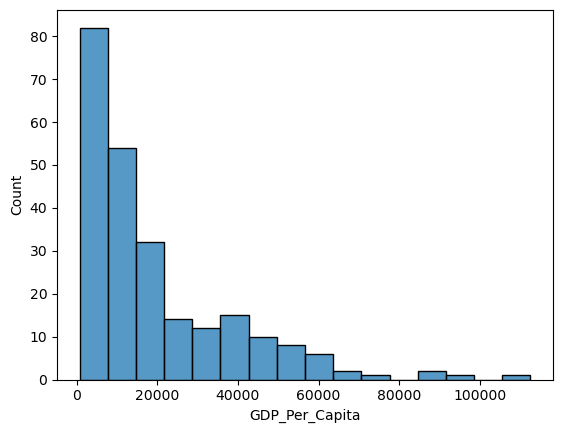

In [18]:
sns.histplot(data=gdp_info_20, x="GDP_Per_Capita")
plt.show()

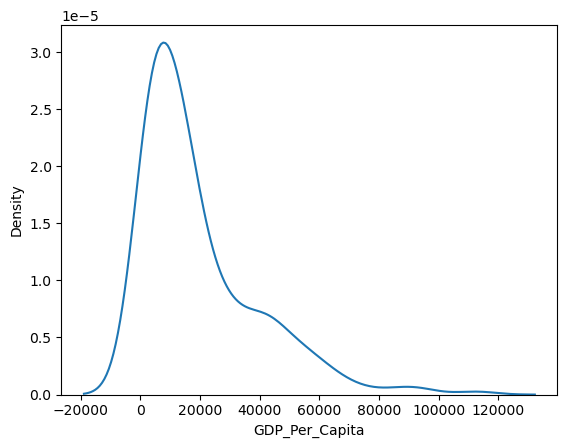

In [19]:
sns.kdeplot(gdp_info_20['GDP_Per_Capita'])
plt.show()

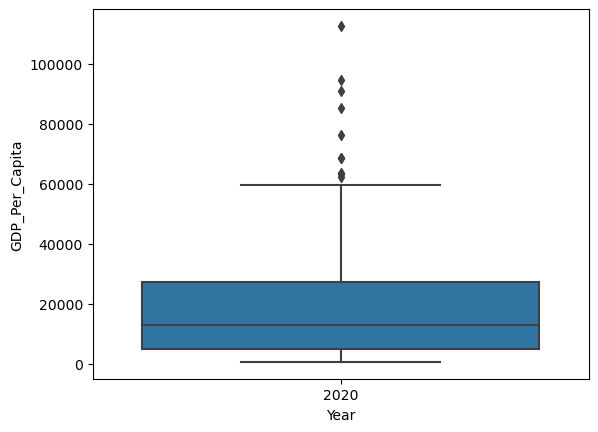

In [20]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_info_20)
plt.show()

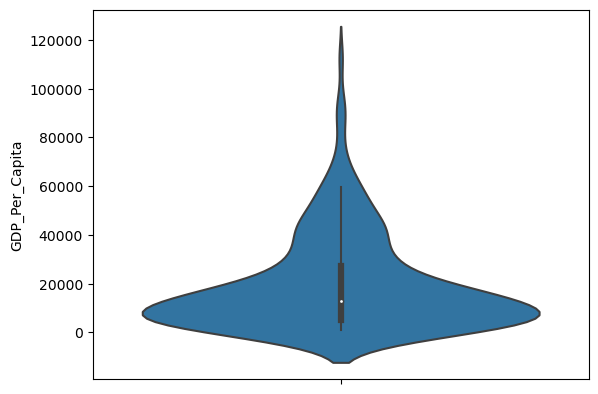

In [21]:
sns.violinplot(y=gdp_info_20["GDP_Per_Capita"])
plt.show()

##Histogram & Density Plot give the most readable/understandable information. 

In [22]:
gdp_info.loc[gdp_df['Year'] == 2020].GDP_Per_Capita.median()

12908.9374056206

In [23]:
gdp_info.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [24]:
gdp_decades = gdp_info.loc[(gdp_info['Year']==1990)|(gdp_info['Year']==2000)|(gdp_info['Year']==2010)|(gdp_info['Year']==2020)]

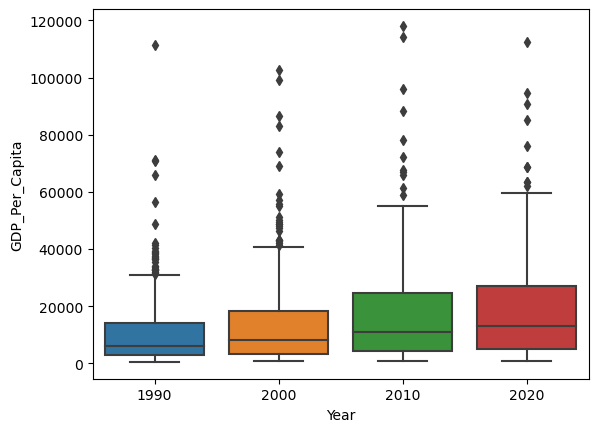

In [32]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades);
plt.show()

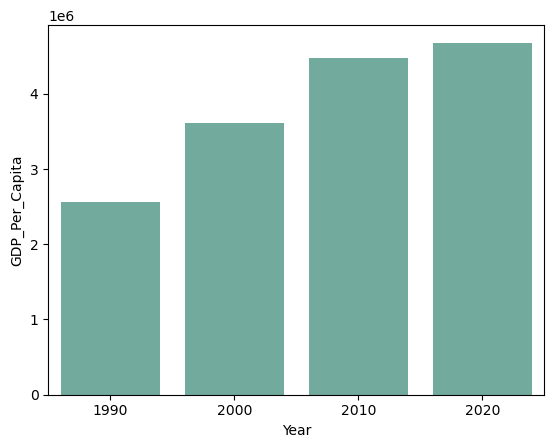

In [33]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

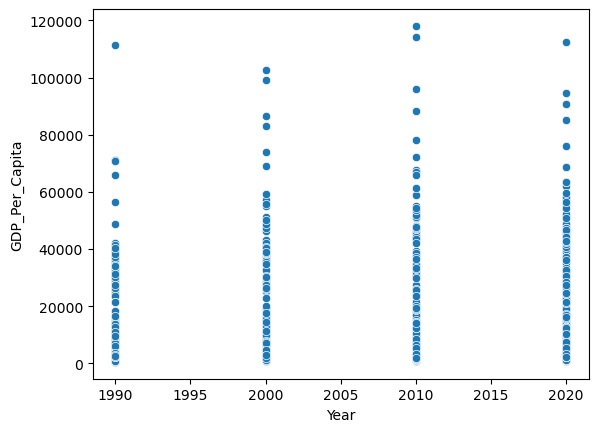

In [34]:
sns.scatterplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita');

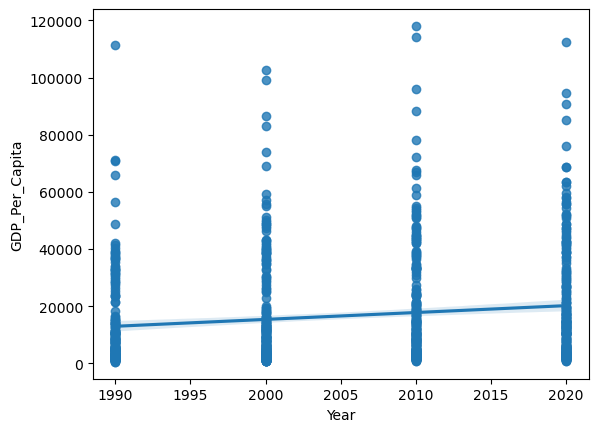

In [35]:
sns.regplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita');

In [36]:
gdp_info
first_gdp_over_100k = gdp_info[gdp_info.GDP_Per_Capita > 100000].sort_values(by = 'Year', ascending = True)
first_gdp_over_100k.head(1)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


In [37]:
gdp_info=gdp_info.loc[gdp_info['GDP_Per_Capita']==gdp_info['GDP_Per_Capita'].max()]
gdp_info

,Country,Year,GDP_Per_Capita
3920,"Macao SAR, China",2013,161971.464661


In [38]:
highest_gdp_2020= gdp_info[gdp_info.Year==2020]
highest_gdp_2020

,Country,Year,GDP_Per_Capita


In [42]:
highest_gdp_2020_max = highest_gdp_2020.sort_values(by = 'GDP_Per_Capita')
gdp_info

,Country,Year,GDP_Per_Capita
3920,"Macao SAR, China",2013,161971.464661


In [43]:
highest_gdp_2020_max.head()

,Country,Year,GDP_Per_Capita


In [44]:
highest_gdp_2020_max.tail()

,Country,Year,GDP_Per_Capita


In [45]:
gdp_lux = gdp_info[gdp_info.Country == 'Luxembourg']
gdp_lux

,Country,Year,GDP_Per_Capita


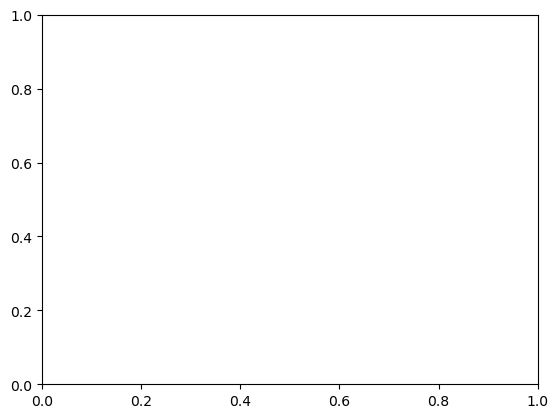

In [49]:
sns.lineplot(data = highest_gdp_2020, x = 'Year', y = 'GDP_Per_Capita');

In [50]:
poorest_2020 = year_2020.sort_values('GDP_Per_Capita').rest_index().loc[0, 'Country']

NameError: name 'year_2020' is not defined